<a href="https://colab.research.google.com/github/salil82/dx602-final-project/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DX 602 Final Project

## Introduction

In this project, you will practice the skills that you have learned throughout this module with a heavy focus on building models.
Most of the problems and questions are open ended compared to your previous homeworks, and you will be asked to explain your choices.
Most of them will have a particular type of solution implied, but it is up to you to figure out the details based on what you have learned in this module.

## Instructions

Each problem asks you to perform build models, run a computation, or otherwise perform some analysis of the data, and usually answer some questions about the results.
Make sure that your question answers are well supported by your analysis and explanations; simply stating an answer without support will earn minimal points.

Notebook cells for code and text have been added for your convenience, but feel free to add additional cells.

## Example Code

You may find it helpful to refer to this GitHub repository of Jupyter notebooks for example code.

* https://github.com/bu-cds-omds/dx601-examples
* https://github.com/bu-cds-omds/dx602-examples

Any calculations demonstrated in code examples or videos may be found in these notebooks, and you are allowed to copy this example code in your homework answers.

## Submission

This project will be entirely manually graded.
However, we may rerun some or all of your code to confirm that it works as described.

### Late Policy

The normal homework late policy for OMDS does not apply to this project.
Boston University requires final grades to be submitted within 72 hours of class instruction ending, so we cannot accommodate 5 days of late submissions.

However, we have delayed the due date of this project to be substantially later than necessary given its scope, and given you more days for submission with full credit than you would have had days for submission with partial credit under the homework late policy.
The Thanksgiving holiday was also taken into account in setting the deadline.
Finally, the deadlines for DX 601 and DX 602 were coordinated to be a week apart while giving ample time for both of their projects.

## Shared Imports

For this project, you are forbidden to use modules that were not loaded in this template.
While other modules are handy in practice, modules that trivialize these problems interfere with our assessment of your own knowledge and skills.

If you believe a module covered in the course material (not live sessions) is missing, please check with your learning facilitator.

In [2]:
import math
import sys

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import sklearn.linear_model

## Problems

### Problem 1 (5 points)

Pick one of the following data sets to analyze in this project.
Load the data set, and show a random sample of 10 rows.

* [Wine Quality](https://archive.ics.uci.edu/dataset/186/wine+quality) ([PMLB - red subset only](https://github.com/EpistasisLab/pmlb/tree/master/datasets/wine_quality_red))
* [Body Fat](https://www.openml.org/search?type=data&status=active&id=560) ([PMLB](https://github.com/EpistasisLab/pmlb/tree/master/datasets/560_bodyfat))

The PMLB copies of the data are generally cleaner and recommended for this project, but the other links are provided to give you more context.
To load the data from the PMLB Github repository, navigate to the `.tsv.gz` file in GitHub and copy the link from the "Raw" button.

If the dataset has missing data, you should drop the rows with missing data before proceeding.
If the data set you choose has more than ten columns, you may limit later analysis that is requested per column to just the first ten columns.

In [4]:
# YOUR CODE HERE

wine_df = pd.read_csv('https://github.com/EpistasisLab/pmlb/raw/refs/heads/master/datasets/wine_quality_red/wine_quality_red.tsv.gz', sep='\t')
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
wine_df = wine_df.dropna()
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


YOUR ANSWERS HERE

There are no rows with missing values in the wine datset.

### Problem 2 (10 points)

List all of the columns and describe them in your own words.

In [5]:
# YOUR CODE HERE

wine_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'target'],
      dtype='object')

YOUR ANSWERS HERE

* fixed acidity: non-volatile acids in the wine, which
contribute to the tartness of the wine
* volatile acidity: volatile acids in the wine. if it's too high, the wine could be spoiled and taste like vinegar
* citric acid: one of the three predominant acids in wine
* residual sugar: sugar from the grapes left over after fermenentation
* chlorides: amount of salt, sodium chloride, in the wine
* free sulfur dioxide: available SO2 in wine to protect against oxidation and spoilage
* total sulfur dioxide: free plus bound SO2
* density: related to alcohol and sugar content;
* pH: acidity of the wine. most wines have a pH between 3-4
* sulphates: help preserve the wine
* alcohol: alcohol content of the wine, usually measured by volume
* target: wine quality on a scale of 0 to 10

### Problem 3 (50 points)

Perform an exploratory analysis of the data set.
After your exploratory analysis, pick 3 individual charts that you the think were particularly interesting.
Repeat those charts separately from your original analysis, and after each of those charts, explain what you thought was noteworthy.

In [6]:
# YOUR CODE HERE

wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


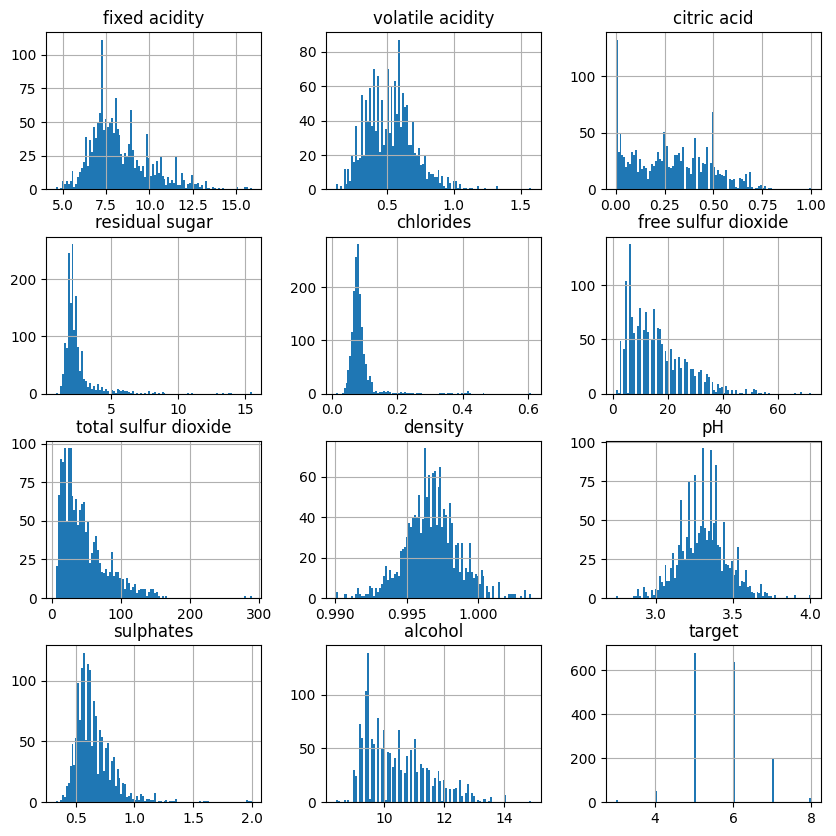

In [ ]:
wine_df.hist(bins = 100, figsize=(10, 10))
plt.show()

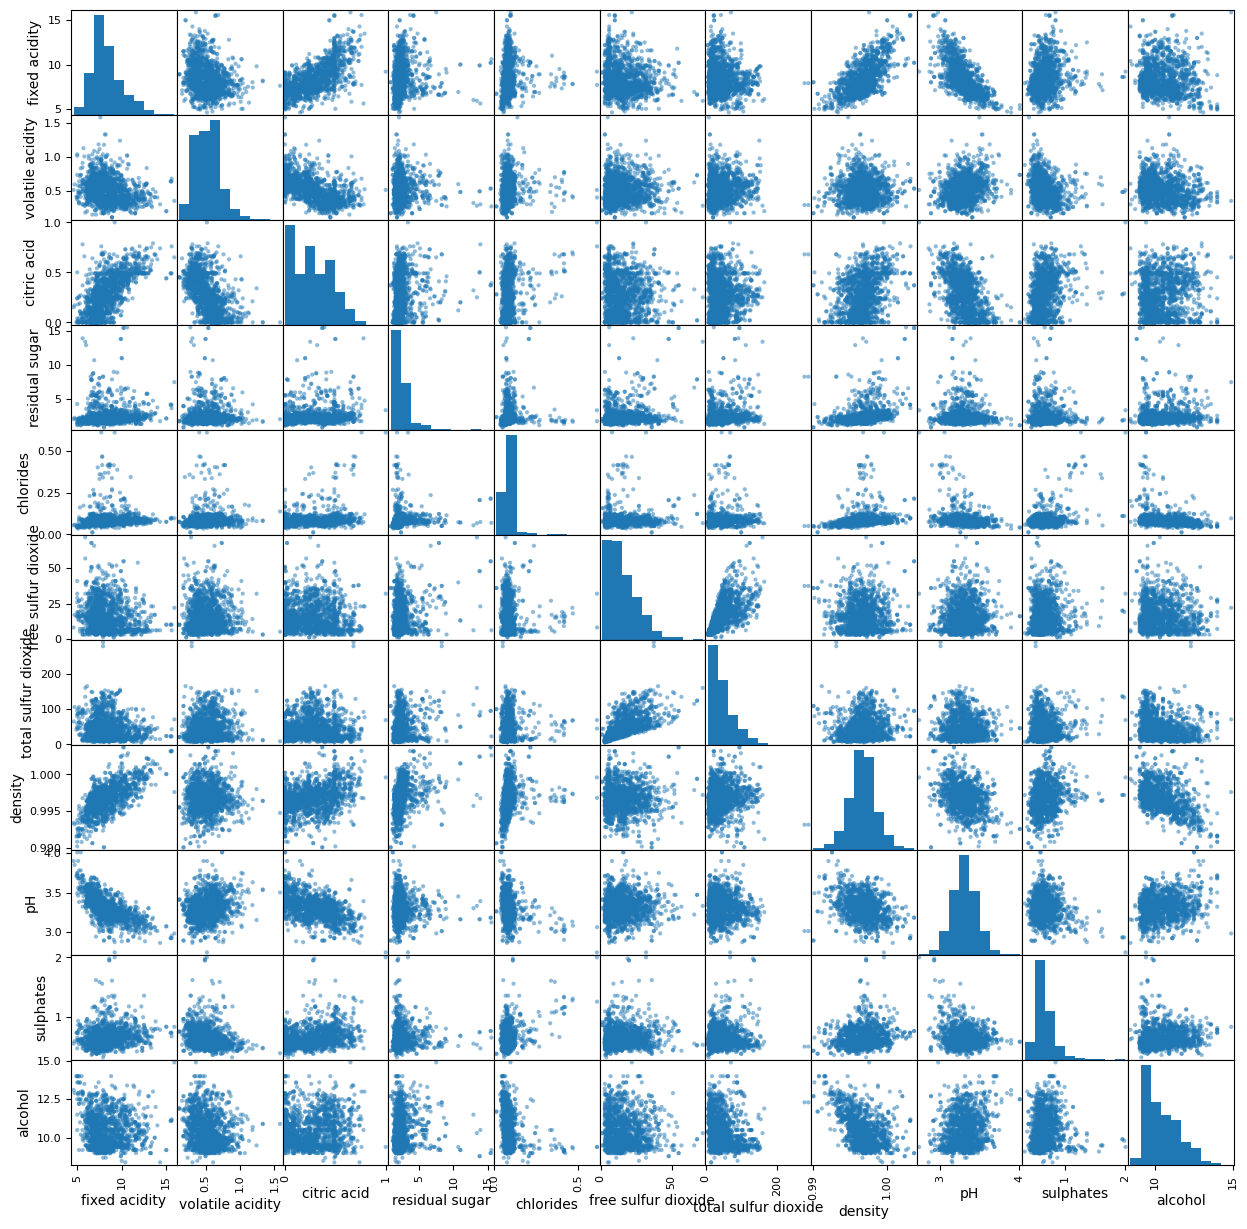

In [ ]:
_ = pd.plotting.scatter_matrix(wine_df.drop('target', axis=1), figsize=(15, 15))
plt.show()

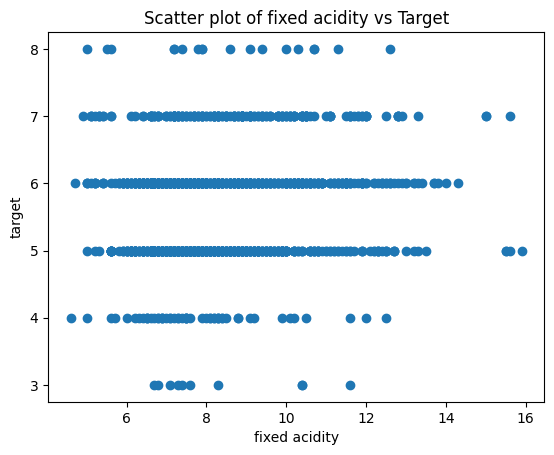

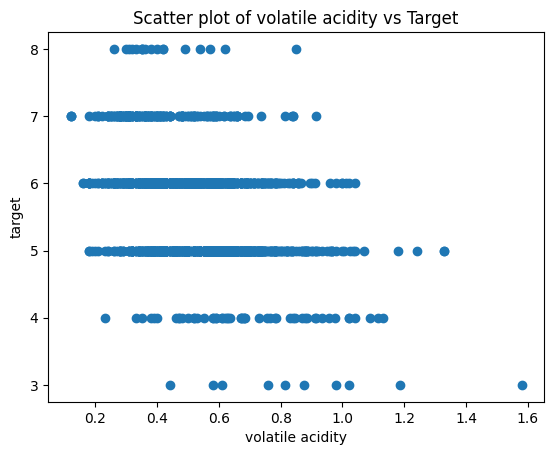

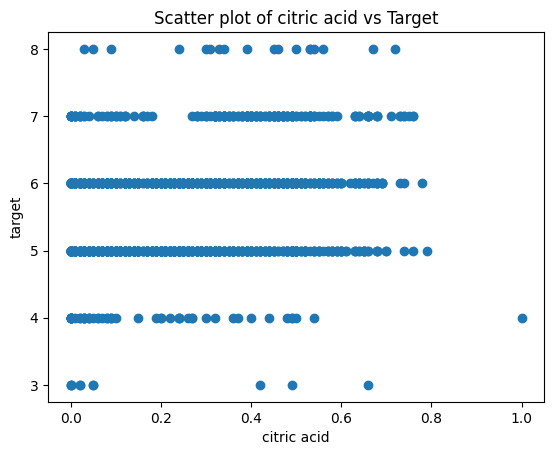

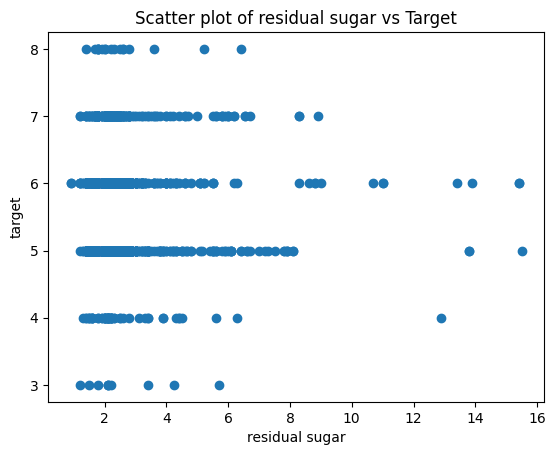

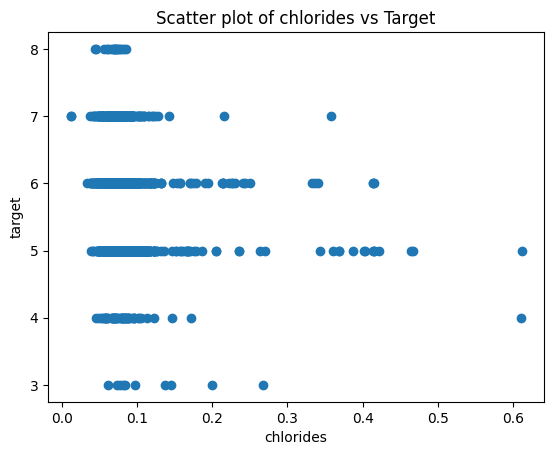

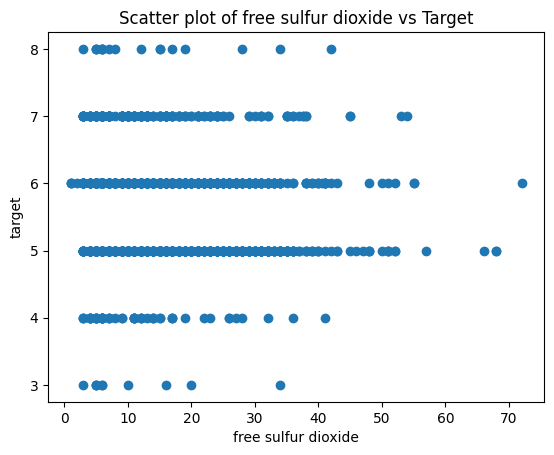

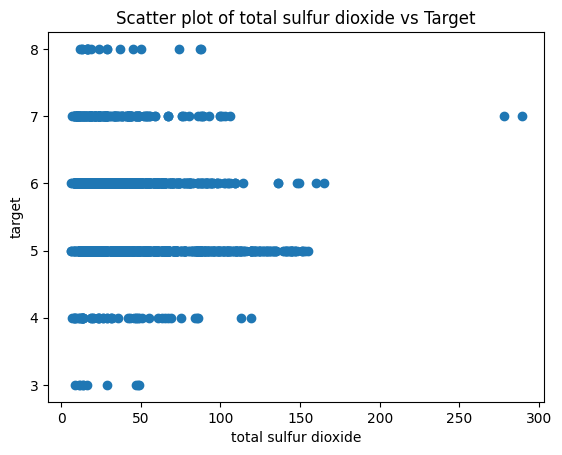

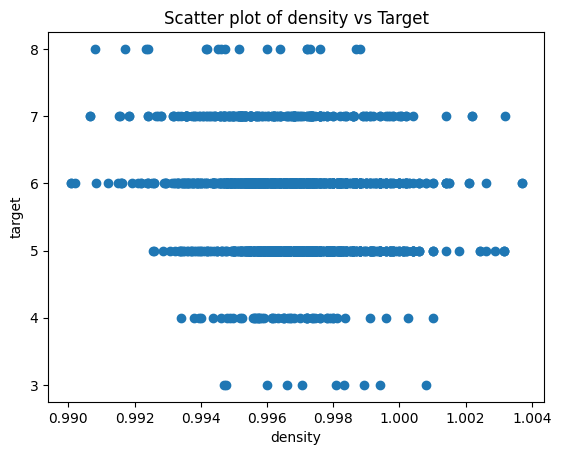

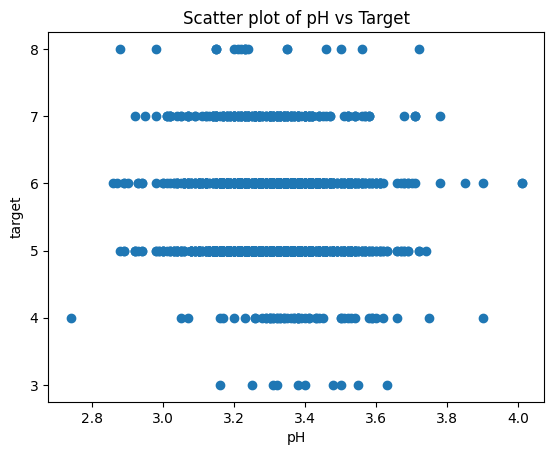

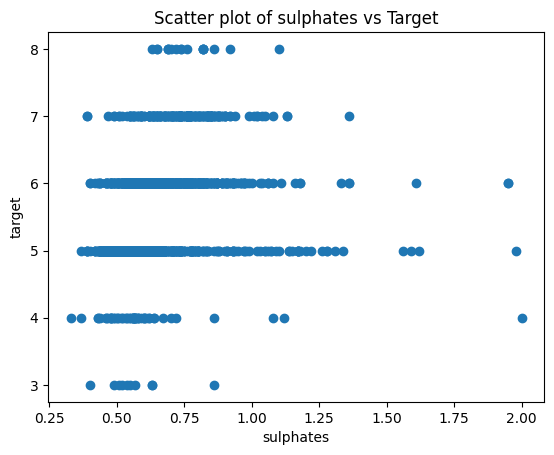

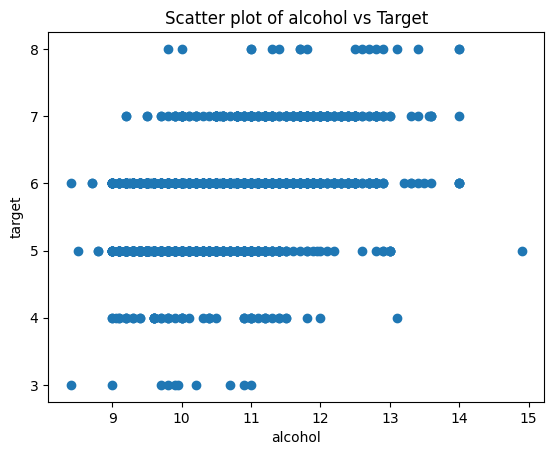

In [ ]:
for column in wine_df.columns:
    if column != 'target':
        plt.scatter(wine_df[column], wine_df['target'])
        plt.xlabel(column)
        plt.ylabel('target')
        plt.title(f'Scatter plot of {column} vs Target')
        plt.show()

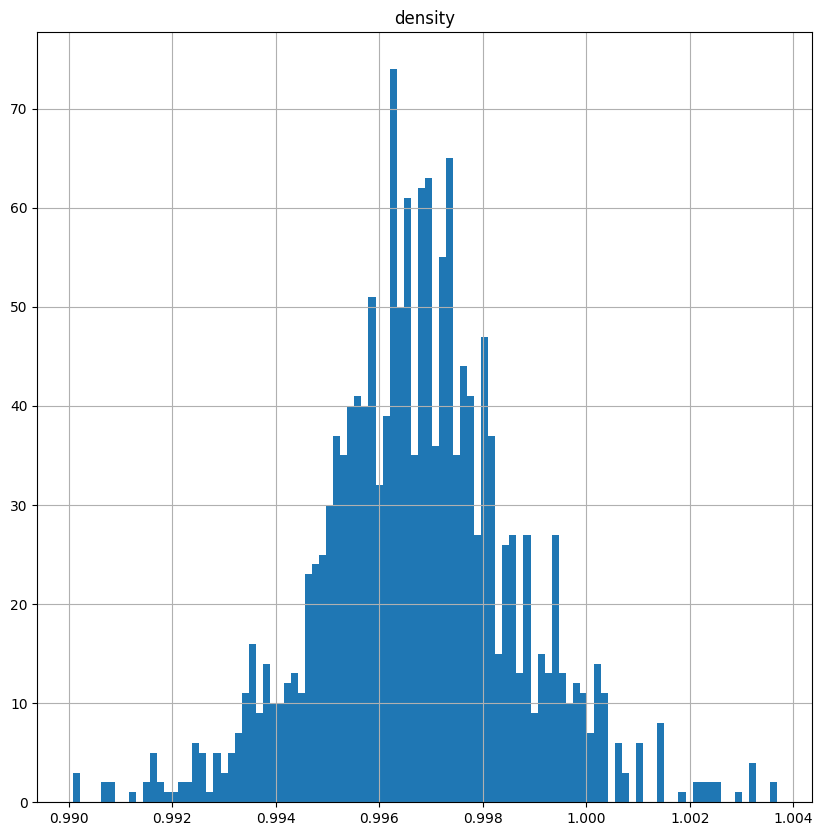

In [10]:
wine_df[['density']].hist(bins = 100, figsize=(10, 10))
plt.show()

I chose the density histogram because it appreared to have a normal, symmetrical distribution.

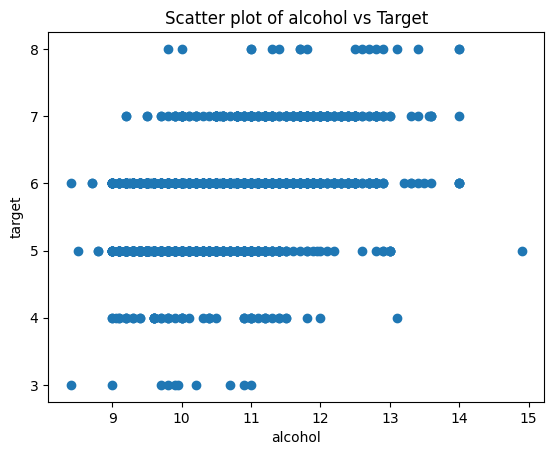

In [5]:
plt.scatter(wine_df['alcohol'], wine_df['target'])
plt.xlabel('alcohol')
plt.ylabel('target')
plt.title('Scatter plot of alcohol vs Target')
plt.show()

Alcohol shows a positive dependency with high alcohol content correlating with high quality/target.

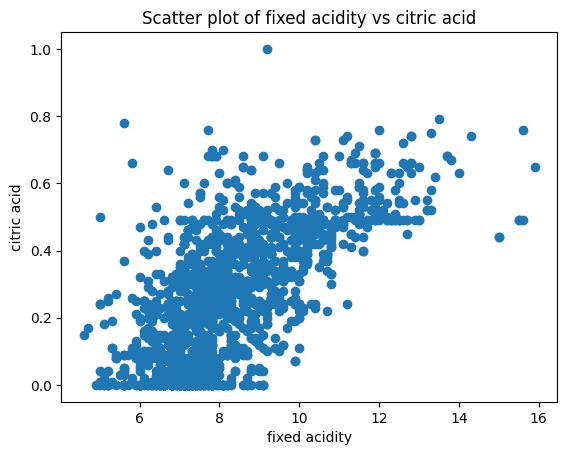

In [13]:
plt.scatter(wine_df['fixed acidity'], wine_df['citric acid'])
plt.xlabel('fixed acidity')
plt.ylabel('citric acid')
plt.title('Scatter plot of fixed acidity vs citric acid')
plt.show()

The scatter plot of citric acid and fixed acidity shows a positive correlation. This would make sense because the more citric acid in the wine, the higher the acidity.

YOUR ANSWERS HERE

### Problem 4 (5 points)

Plot the correlation matrix of the numeric columns in the data set.
Which pair of different columns were highlighted as the most correlated?

In [7]:
# YOUR CODE HERE

wine_df.corr().style.background_gradient(cmap='coolwarm')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


YOUR ANSWERS HERE

Fixed acidity and citric acid have the highest positive correlation while pH and fixed acidity have the highest negative correlation

### Problem 5 (10 points)

Pick three different regression model classes to try in problem 6 from the scikit-learn documentation.
For each class, provide a link to the scikit-learn documentation, and a link to another web page describing how that kind of model works.
The second link should not be from scikit-learn, but Wikipedia is acceptable.
You do not need to understand the methods at this time, but it is good to be comfortable researching them.

In [7]:
# YOUR CODE HERE

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

YOUR ANSWERS HERE

 * **Linear Regression**
    *   Scikit-learn: [https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
    *   Explanation: [https://en.wikipedia.org/wiki/Linear_regression](https://en.wikipedia.org/wiki/Linear_regression)

* **Ridge Regression**
    *   Scikit-learn: [https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)
    *   Explanation: [https://en.wikipedia.org/wiki/Ridge_regression](https://en.wikipedia.org/wiki/Ridge_regression)

* **Lasso Regression**
    *   Scikit-learn: [https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)
    *   Explanation: [https://en.wikipedia.org/wiki/Lasso_(statistics)](https://en.wikipedia.org/wiki/Lasso_(statistics))

### Problem 6 (50 points)

Build three different regression models using the entire data set.
Plot the actual target vs the predicted values for each in one chart.
Compute the L2 and L1 losses for each of them.
You may use any regression class provided provided by scikit-learn, and you may reuse one class as long as you change its parameters enough to see different results.

In [8]:
# YOUR CODE HERE

X = wine_df.drop('target', axis=1)
y = wine_df['target']

model1 = LinearRegression()
model1.fit(X, y)

y_pred1 = model1.predict(X)

model2 = Ridge()
model2.fit(X, y)

y_pred2 = model2.predict(X)

model3 = Lasso()
model3.fit(X, y)

y_pred3 = model3.predict(X)

In [9]:
L1_loss1 = np.mean(np.abs(y - y_pred1))
L2_loss1 = np.mean((y - y_pred1)**2)

L1_loss2 = np.mean(np.abs(y - y_pred2))
L2_loss2 = np.mean((y - y_pred2)**2)

L1_loss3 = np.mean(np.abs(y - y_pred3))
L2_loss3 = np.mean((y - y_pred3)**2)

print(f'Linear Regression: L1 Loss = {L1_loss1}, L2 Loss = {L2_loss1}')
print(f'Ridge Regression: L1 Loss = {L1_loss2}, L2 Loss = {L2_loss2}')
print(f'Lasso Regression: L1 Loss = {L1_loss3}, L2 Loss = {L2_loss3}')

Linear Regression: L1 Loss = 0.5004899635644883, L2 Loss = 0.41676716722140794
Ridge Regression: L1 Loss = 0.5012320051944336, L2 Loss = 0.41746575596828844
Lasso Regression: L1 Loss = 0.6556349915893915, L2 Loss = 0.6303545492692615


Text(0.5, 1.0, 'Actual vs Predicted Values (Linear Regression Model)')

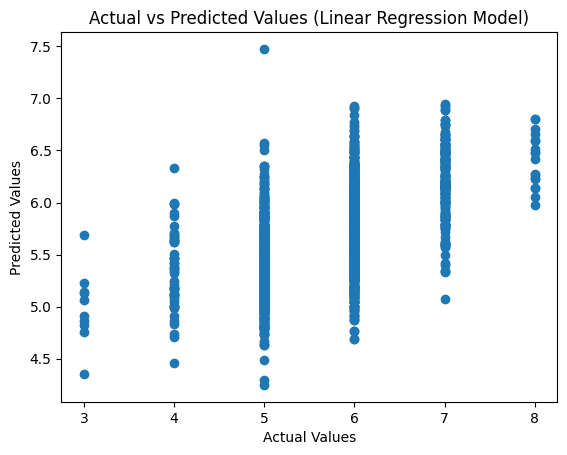

In [12]:
plt.scatter(y, y_pred1, label='Linear Regression')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Linear Regression Model)')

Text(0.5, 1.0, 'Actual vs Predicted Values (Ridge Model)')

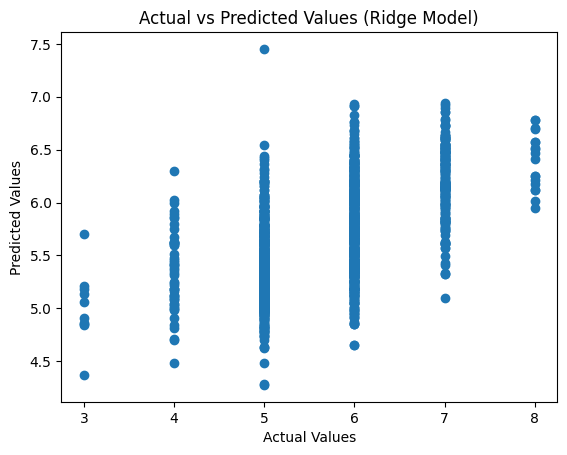

In [13]:
plt.scatter(y, y_pred2, label='Ridge Regression')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Ridge Model)')



Text(0.5, 1.0, 'Actual vs Predicted Values (Lasso Model)')

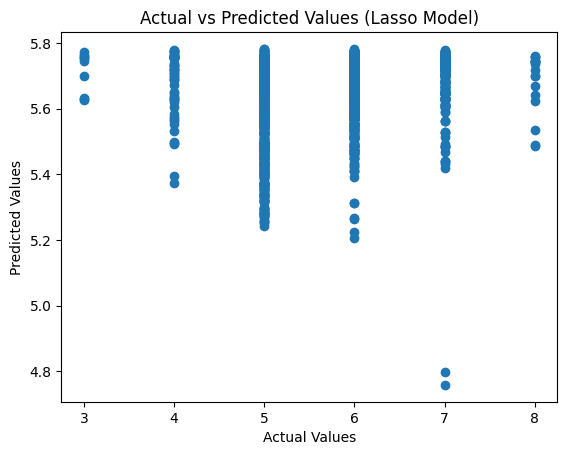

In [14]:
plt.scatter(y, y_pred3, label='Lasso Regression')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Lasso Model)')

YOUR ANSWERS HERE

### Problem 7 (30 points)

Use 5-fold cross-validation to repeat building the same three kinds of regression models. Compare the L2 losses predicted by cross-validation against the L2 losses training against the whole data set. (The difference is likely from overfitting in the latter.)

In [15]:
# YOUR CODE HERE

from sklearn.model_selection import cross_val_score

cv_scores1 = cross_val_score(model1, X, y, cv=5, scoring='neg_mean_squared_error')
cv_scores2 = cross_val_score(model2, X, y, cv=5, scoring='neg_mean_squared_error')
cv_scores3 = cross_val_score(model3, X, y, cv=5, scoring='neg_mean_squared_error')

cv_l2_loss1 = -np.mean(cv_scores1)
cv_l2_loss2 = -np.mean(cv_scores2)
cv_l2_loss3 = -np.mean(cv_scores3)

print(f'Linear Regression: CV L2 Loss = {cv_l2_loss1}')
print(f'Ridge Regression: CV L2 Loss = {cv_l2_loss2}')
print(f'Lasso Regression: CV L2 Loss = {cv_l2_loss3}')

Linear Regression: CV L2 Loss = 0.4366293880320982
Ridge Regression: CV L2 Loss = 0.43650482489099574
Lasso Regression: CV L2 Loss = 0.6471152211778115


YOUR ANSWERS HERE

The L2 losses are slightly higher in this problem with cross-validation than in the previous problem. As mentioned, the difference is likely from overfitting.

### Problem 8 (25 points)

Build three different regression models as in problem 6, but preprocess the data so that each column has mean zero and standard deviation one first.
For full credit, use a scikit-learn pipeline for each model.
For each model, compare the L2 losses -- which of them performed differently from your results in problem 6?

(This process will be covered in week 13.)

In [16]:
# YOUR CODE HERE

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# preprocess the data so that each column has mean 0 and standard deviation 1

# Model 1: Linear Regression with StandardScaler
pipeline1 = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])
pipeline1.fit(X, y)
y_pred_p8_1 = pipeline1.predict(X)

# Model 2: Ridge Regression with StandardScaler
pipeline2 = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', Ridge())
])
pipeline2.fit(X, y)
y_pred_p8_2 = pipeline2.predict(X)

# Model 3: Lasso Regression with StandardScaler
pipeline3 = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', Lasso())
])
pipeline3.fit(X, y)
y_pred_p8_3 = pipeline3.predict(X)

In [17]:
# L2 losses for Problem 8 models
L2_loss_p8_1 = np.mean((y - y_pred_p8_1)**2)
L2_loss_p8_2 = np.mean((y - y_pred_p8_2)**2)
L2_loss_p8_3 = np.mean((y - y_pred_p8_3)**2)

print(f'Problem 8 - Linear Regression (Scaled): L2 Loss = {L2_loss_p8_1}')
print(f'Problem 8 - Ridge Regression (Scaled): L2 Loss = {L2_loss_p8_2}')
print(f'Problem 8 - Lasso Regression (Scaled): L2 Loss = {L2_loss_p8_3}')

print('\nComparison with Problem 6 (unscaled models):')
print(f'Problem 6 - Linear Regression: L2 Loss = {L2_loss1}')
print(f'Problem 6 - Ridge Regression: L2 Loss = {L2_loss2}')
print(f'Problem 6 - Lasso Regression: L2 Loss = {L2_loss3}')

Problem 8 - Linear Regression (Scaled): L2 Loss = 0.41676716722140805
Problem 8 - Ridge Regression (Scaled): L2 Loss = 0.41676727989819734
Problem 8 - Lasso Regression (Scaled): L2 Loss = 0.6517605398308277

Comparison with Problem 6 (unscaled models):
Problem 6 - Linear Regression: L2 Loss = 0.41676716722140794
Problem 6 - Ridge Regression: L2 Loss = 0.41746575596828844
Problem 6 - Lasso Regression: L2 Loss = 0.6303545492692615


YOUR ANSWERS HERE

The L2 loss for linear regression is virtually identical to the one from Problem 6. The L2 loss for Ridge Regression decreased slightly with scaling. The L2 loss for Lasso increased slightly with scaling.

### Problem 9 (5 points)

A colleague suggests that you find better models by repeatedly building decision trees with random depth limits.
They say that trying 1000 such models will likely find an improvement as long as you use cross validation.
Give a one sentence response to this suggestion.

In [ ]:
# YOUR CODE HERE

YOUR ANSWERS HERE

This could result in overfitting and would presumably take more time and computing power than necessary.

### Problem 10 (10 points)

Pick a best model from all the models that you built and otherwise described in this project.
Explain how you picked it, including what criteria you chose, and how the other models compared by that criteria.
As much as possible, justify that problem in the context of the original data set.

In [ ]:
# YOUR CODE HERE

YOUR ANSWERS HERE

Linear Regression: I chose the linear regression model because it usually had the lowest error in most instances. This included L1 and L2 losses in  Problem 6 and the scaled L2 loss in Problem 8. The cross-validated  L2 loss for linear regression in Problem 7 was virtually identical to the L2 loss from Ridge Regression. The Lasso Regression had much higher losses in all scenarios while the Ridge Regression had similar losses as linear regression.